In [87]:
import pandas as pd
import numpy as np
import os
import math
from imblearn.ensemble import BalancedBaggingClassifier, BalancedRandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score, roc_curve
from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
import seaborn as sns
import matplotlib.pyplot as plt
import pickle as pkl
%matplotlib inline

In [88]:
train_df = pd.read_csv('../dataset/train_cleaned.csv', sep='|')
val_df = pd.read_csv('../dataset/val_cleaned.csv', sep='|')

In [89]:
X_train = train_df.drop(columns=['patient_id', 'SepsisLabel'])
y_train = train_df.SepsisLabel
X_val = val_df.drop(columns=['patient_id', 'SepsisLabel'])
y_val = val_df.SepsisLabel

In [90]:
# class BaggingClassifier(object):
#     def __init__(self, n_estimators):
#         self.n_estimators = n_estimators
#         self.classifiers = []
        
        
#     def fit(self, X, y):
#         for i in range(self.n_estimators):
#             clf = DecisionTreeClassifier(max_depth=6,
#                                          class_weight={0:1, 1:5})
#             clf.fit(X, y)
#             self.classifiers.append(clf)
            
#     def predict(self, X):
#         results = []
#         final_pred = []
#         for clf in self.classifiers:
#             res = clf.predict(X)
#             results.append(res)
        
    
            

In [97]:
clf = BalancedRandomForestClassifier(n_estimators=300,
                                     max_depth=12,
                                     bootstrap=True,
                                     class_weight={0:1.5, 1:1})
clf.fit(X_train, y_train)

# get f1 score
y_pred = clf.predict(X_val)
f1_score(y_val, y_pred)

0.14908668567205152

In [98]:
clf.score(X_val, y_val)

0.8646694822041796

In [99]:
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3)
scores = cross_val_score(clf, X_val, y_val, scoring='roc_auc',\
                        cv=cv, n_jobs=-1)
print('ROC AUC: %.3f' % np.mean(scores))

ROC AUC: 0.862


In [94]:
y_pred_proba = clf.predict_proba(X_val)[::, 1]
fpr, tpr, _ = roc_curve(y_val, y_pred_proba)

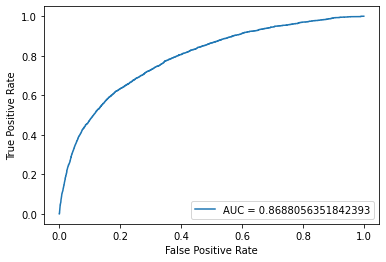

In [95]:
plt.plot(fpr, tpr, label='AUC = ' + str(np.mean(scores)))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

In [100]:
with open('../BRFC.pkl', 'wb') as file:
    pkl.dump(clf, file)